<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#%tensorflow_version 2.x
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

Normal distribution
Uniform distribution
You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters mu and sigma in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.


In [71]:
np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
  # labels 1 and 0 with probability of 1/2
  c = [0 if np.random.rand(1) < .5 else 1 for x in range(m)]

  # creating a new list for (-1)^c
  alt_c = [(-1)**i for i in c]
  noise = np.multiply(alt_c, np.random.normal(loc=mu, scale=sigma, size=m)) 
  
  # uniform distribution [0, 1)
  x_1 = np.random.uniform(low=0, high=1, size=m)

  listy = np.multiply(w, x_1)
  x_2 = np.add(listy, noise)
  
  # create an array for the colors for each class
  
  return x_1, x_2, c

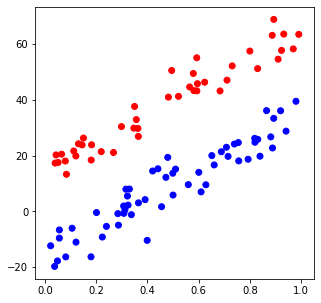

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x220590b6b08>)

In [72]:
def graph_random_data(w, b, mu, sigma, m):
  x_1, x_2, c = get_random_data(w, b, mu, sigma, m)
  fig, ax = plt.subplots(figsize=(5,5))

  colors = ['blue' if c[x] == 1 else 'red' for x in range(m)]

  ax.scatter(x_1, x_2, c=colors)
  plt.show()
  return fig, ax

graph_random_data(50,10,15,5,100)

**Problem 2**

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss. 

How well does the trained model separate the red and blue dots?  You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function ```get_weights```. See [https://keras.io/layers/about-keras-layers/](https://keras.io/layers/about-keras-layers/).  

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer).  This is not immediately obvious.  It maybe helpful to take a look at the heatmap below.

The trained model realizes function ```f : R^2 -> R``` that takes two features as input and outputs a number in the interval ```[0, 1]```. Use a heatmap to visualize this function.  

---

In [73]:
# get data and test train split
x_1, x_2, y = get_random_data(100,10,15,5,100)

# X = (x1, x2 ... xn)T
X = np.array([x_1, x_2]).T

y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [74]:
def build_model(input_dim, output_dim):
  model = keras.Sequential()
  model.add(tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

  return model



In [75]:
# number of inputs
input_dim = 2
# output dimensions (classes)
output_dim = 1
model = build_model(input_dim, output_dim)

EPOCHS = 300

history = model.fit(x_train, y_train, epochs=EPOCHS)

Train on 75 samples
Epoch 1/300
75/75 [==============================] - 0s 3ms/sample - loss: 36.9652
Epoch 2/300
75/75 [==============================] - 0s 80us/sample - loss: 25.8836
Epoch 3/300
75/75 [==============================] - 0s 80us/sample - loss: 15.4575
Epoch 4/300
75/75 [==============================] - 0s 94us/sample - loss: 5.0029
Epoch 5/300
75/75 [==============================] - 0s 80us/sample - loss: 3.0310
Epoch 6/300
75/75 [==============================] - 0s 120us/sample - loss: 5.6103
Epoch 7/300
75/75 [==============================] - 0s 80us/sample - loss: 6.8314
Epoch 8/300
75/75 [==============================] - 0s 107us/sample - loss: 6.8668
Epoch 9/300
75/75 [==============================] - 0s 80us/sample - loss: 5.9196
Epoch 10/300
75/75 [==============================] - 0s 94us/sample - loss: 4.2421
Epoch 11/300
75/75 [==============================] - 0s 80us/sample - loss: 1.9974
Epoch 12/300
75/75 [==============================] - 0s 93us

75/75 [==============================] - 0s 107us/sample - loss: 0.3251
Epoch 98/300
75/75 [==============================] - 0s 107us/sample - loss: 0.3217
Epoch 99/300
75/75 [==============================] - 0s 107us/sample - loss: 0.3184
Epoch 100/300
75/75 [==============================] - 0s 93us/sample - loss: 0.3153
Epoch 101/300
75/75 [==============================] - 0s 107us/sample - loss: 0.3127
Epoch 102/300
75/75 [==============================] - 0s 80us/sample - loss: 0.3106
Epoch 103/300
75/75 [==============================] - 0s 93us/sample - loss: 0.3094
Epoch 104/300
75/75 [==============================] - 0s 93us/sample - loss: 0.3207
Epoch 105/300
75/75 [==============================] - 0s 107us/sample - loss: 0.3035
Epoch 106/300
75/75 [==============================] - 0s 107us/sample - loss: 0.3149
Epoch 107/300
75/75 [==============================] - 0s 93us/sample - loss: 0.2999
Epoch 108/300
75/75 [==============================] - 0s 93us/sample - los

75/75 [==============================] - 0s 105us/sample - loss: 0.1886
Epoch 194/300
75/75 [==============================] - 0s 108us/sample - loss: 0.1904
Epoch 195/300
75/75 [==============================] - 0s 120us/sample - loss: 0.1820
Epoch 196/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1766
Epoch 197/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1780
Epoch 198/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1727
Epoch 199/300
75/75 [==============================] - 0s 80us/sample - loss: 0.1663
Epoch 200/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1700
Epoch 201/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1667
Epoch 202/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1677
Epoch 203/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1609
Epoch 204/300
75/75 [==============================] - 0s 93us/sample - l

75/75 [==============================] - 0s 94us/sample - loss: 0.1257
Epoch 290/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1165
Epoch 291/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1324
Epoch 292/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1159
Epoch 293/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1221
Epoch 294/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1142
Epoch 295/300
75/75 [==============================] - 0s 93us/sample - loss: 0.1238
Epoch 296/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1431
Epoch 297/300
75/75 [==============================] - 0s 80us/sample - loss: 0.1234
Epoch 298/300
75/75 [==============================] - 0s 107us/sample - loss: 0.1653
Epoch 299/300
75/75 [==============================] - 0s 93us/sample - loss: 0.2180
Epoch 300/300
75/75 [==============================] - 0s 93us/sample - los

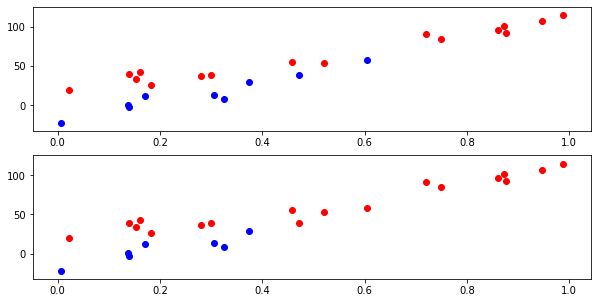

In [77]:
# make predictions
preds = model.predict(x_test)

fig, ax = plt.subplots(2, figsize=(10,5))

for i in range(len(x_test)):
  # plot real value
  ax[0].scatter(x_test[i][0], x_test[i][1], c='blue' if y_test[i] == 1 else 'red', label='Real')
  # plot predictions
  ax[1].scatter(x_test[i][0], x_test[i][1], c='blue' if preds[i] >= .5 else 'red', label='Predictions')
  

In [78]:
# draw line by obtaining weights

# get weights from model
weights = model.get_weights()

# has input shape of 2, which represent our weight vector
print(weights[0].shape)

# has output shape of 1, which will represent our b
print(weights[1].shape)

(2, 1)
(1,)


In [80]:
# these will be the weights we use to plot our graph
# weight vector
print(weights[0])

# bias
print(weights[1])

[[17.786581  ]
 [-0.24418426]]
[0.7244214]


# Obtaining Dividing Line



Currently our predictions are in the form
$ \hat y = \sigma ( w_1 x_1 +w_2 x_2 + b )$

To obtain our dividing line, we are trying to get our weights in the form of

$y = mx + b $

or rather 

$x_2 = (w_1 x_1 + b) / w_2 $

In [81]:
# create an array to represent the space of our data
d = np.linspace(0, 1)

pred_line = -((weights[0][0] * d) + weights[1]) / weights[0][1]

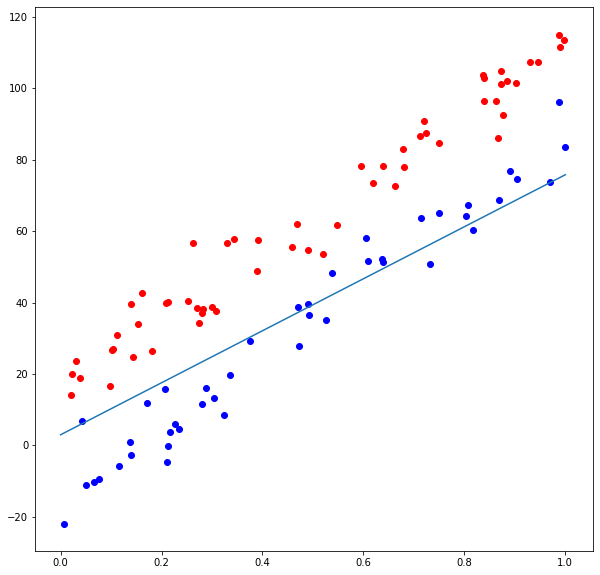

In [82]:
# plot line
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(d, pred_line)


for i in range(len(x_1)):
  # plot real value
  ax.scatter(x_1[i], x_2[i], c='blue' if y[i] == 1 else 'red', label='Real')

plt.show()

In [152]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def make_prediction(w, b, x):
    return sigmoid(np.dot(w.T, x) + b)

# heat map

# find range of x2
range_min = min(x_2)
range_max = max(x_2)
print(range_min, range_max)
xv, yv = np.meshgrid(np.linspace(0,1), np.linspace(range_min, range_max))
xv = xv[0]
yv = [yv[i][0] for i in range(len(yv))]

d = np.array([xv,yv]).T

map = np.zeros((50,50))

for k in range(len(xv)):
    for j in range(len(yv)):
        map[j][k] = make_prediction(weights[0], weights[1], [xv[k], yv[j]])

-22.121631417792216 114.99792872768761
(50, 50)


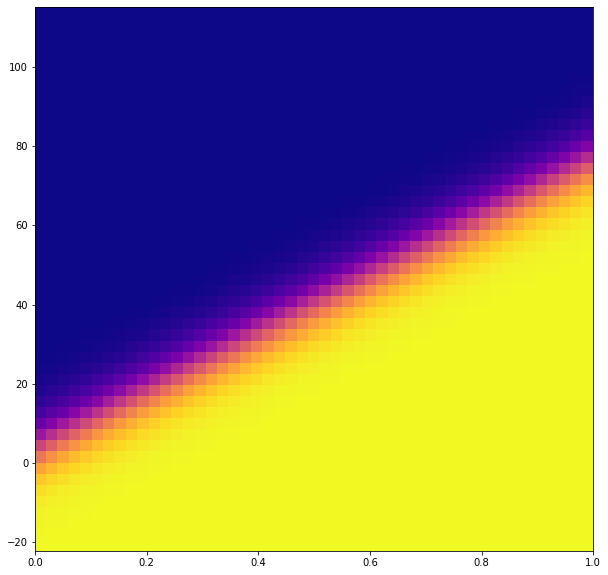

In [155]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(xv, yv, map, shading='gourand', cmap=plt.cm.plasma)
plt.show()

Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece?gi=5969b4744006

https://www.kaggle.com/emilyhorsman/basic-logistic-regression-with-numpy

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

# Logistic Regression Numpy Implementation

$ \hat y = \sigma ( \Sigma_{j=1}^{n} w_j x_j + b ) = \sigma( \vec w^T \vec x + b) $

In [69]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

class cantMultiply(Exception):
  def __init__(self, matrix1, matrix2):
    print('Cannot multiply ', matrix1, ' and ', matrix2)
    
# compute yhat
def make_prediction(w, b, x):
    return sigmoid(np.dot(w.T, x) + b)
    

# Computing Loss

### Binary Cross Entropy Loss
$ L_{ce} -y \log(a) - (1 - y)\log(1-a)$

### Compute Gradients
$ \frac{\delta L_{ce}}{\delta w_j} = (a - y) \cdot x_j $


$  \frac{\delta L_{ce}}{\delta b} = (a - y)$

In [21]:
# compute gradient of loss function for each weight and b
# return the new weights and b
def gradientDescent(a, y, x, w, b, learning_rate=0.1):
    # gradient descent for each weight
    w -= learning_rate * ((a - y) * x)
    
    # compute b
    b -= learning_rate * (a - y)
    
    return w, b

In [62]:
class Model:
    def __init__(self, input_dim=2, learning_rate=0.1  , epochs=300):
        self.input_dim = input_dim
        # weights
        self.w = np.random.rand(input_dim)
        self.b = np.random.rand(1)
        # hyperparameters
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.history = [[self.w[0], self.w[1], self.b[0]]]
    
    def train(self, train_x, train_y): 
        for e in range(self.epochs):
            
            # each example
            for k in range(len(train_x)):
                a = make_prediction(self.w, self.b, train_x[k])
                y = train_y[k]
                
                # update weights
                self.w, self.b = gradientDescent(a, y, train_x[k], self.w, self.b)
                self.history.append([self.w[0], self.w[1], self.b[0]])
                
    def plot_line(self, x, y):
        fig, ax = plt.subplots(figsize=(10,10))
        d = np.linspace(0, 1)
        
        print(self.w)
        pred_line = -((self.w[0] * d) + self.b) / self.w[1]
        ax.plot(d, pred_line)
        
        for i in range(len(x)):
          # plot real value
          ax.scatter(x[i][0], x[i][1], c='blue' if y[i] == 1 else 'red', label='Real')
            
        plt.show()
        
    def plot_history(self, x, y):
        fig, ax = plt.subplots(figsize=(10,10))
        d = np.linspace(0, 1)
        for h in self.history:
            pred_line = -((h[0] * d) + h[2]) / h[1]
            ax.plot(d, pred_line)
            #print(h)
        
        for i in range(len(x)):
          # plot real value
          ax.scatter(x[i][0], x[i][1], c='blue' if y[i] == 1 else 'red', label='Real')
        
        print(self.history[0]) 
        plt.show()

In [63]:
x_1, x_2, y = get_random_data(100,10,15,5,100)

# X = (x1, x2 ... xn)T
X = np.array([x_1, x_2]).T

In [64]:
model = Model()

In [65]:
model.train(X, y)

C:\Users\nspee\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[0.23775906526916868, 0.05041878515062903, 0.7523806567186244]


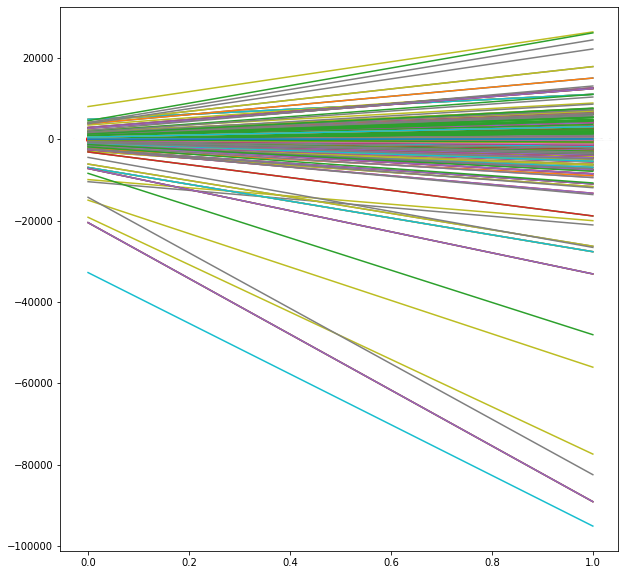

In [66]:
#model.plot_line(X,y)
model.plot_history(X, y)